In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

In [4]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x.shape,y.shape

((150, 4), (150, 1))

In [6]:
x.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [7]:
y.info

<bound method DataFrame.info of      target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]>

In [8]:
x.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [9]:
scaler = StandardScaler()
x = scaler.fit_transform(x.values)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y.values, test_size=0.2, random_state=42)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [12]:
model = GaussianNB()

In [13]:
model.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = model.predict(x_test)

In [15]:
cm = confusion_matrix(y_test,y_pred)

In [16]:
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

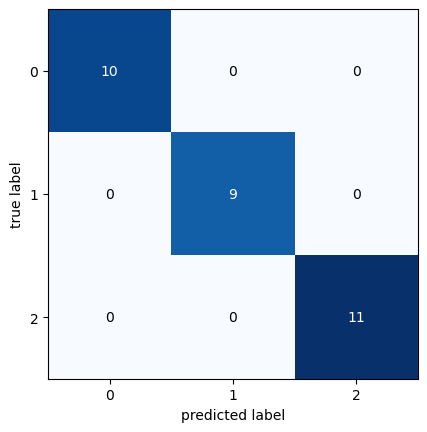

In [17]:
plot_confusion_matrix(conf_mat=cm,)

In [18]:

print(f"TP value is {cm[0,0]}")
print(f"TN value is {cm[1,1] + cm[2,2]}")
print(f"FP value is {cm[0,1] + cm[0,2]}")
print(f"FN value is {cm[1,0] + cm[2,0]}")

TP value is 10
TN value is 20
FP value is 0
FN value is 0


In [19]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 1.0


In [20]:

print(f"Error rate is {1 - accuracy_score(y_test, y_pred)}")

Error rate is 0.0


In [21]:
print(f"Precision score is {precision_score(y_test, y_pred, average='macro')}")

Precision score is 1.0


In [22]:
print(f"Recall score is {recall_score(y_test, y_pred, average='macro')}")

Recall score is 1.0


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

